<a href="https://colab.research.google.com/github/saltatt/Data-science-with-Python/blob/main/practice_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed',errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
print(df['month_added'].head())

0    9.0
1    9.0
2    9.0
3    9.0
4    9.0
Name: month_added, dtype: float64


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
print(df['cast'], df['director'], df['country'].isna().sum())

0                                                 Unknown
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 Unknown
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              Unknown
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object 0       Kirsten Johnson
1               Unknown
2       Julien Leclercq
3               Unknown
4               Unknown
             ...       
8802      David Fincher
8803            Unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object 0


In [ ]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day
print(df['year'].head())
print(df['day'].head())

0    2021.0
1    2021.0
2    2021.0
3    2021.0
4    2021.0
Name: year, dtype: float64
0    25.0
1    24.0
2    24.0
3    24.0
4    24.0
Name: day, dtype: float64


In [ ]:
df.groupby('month')['listed_in'].value_counts()

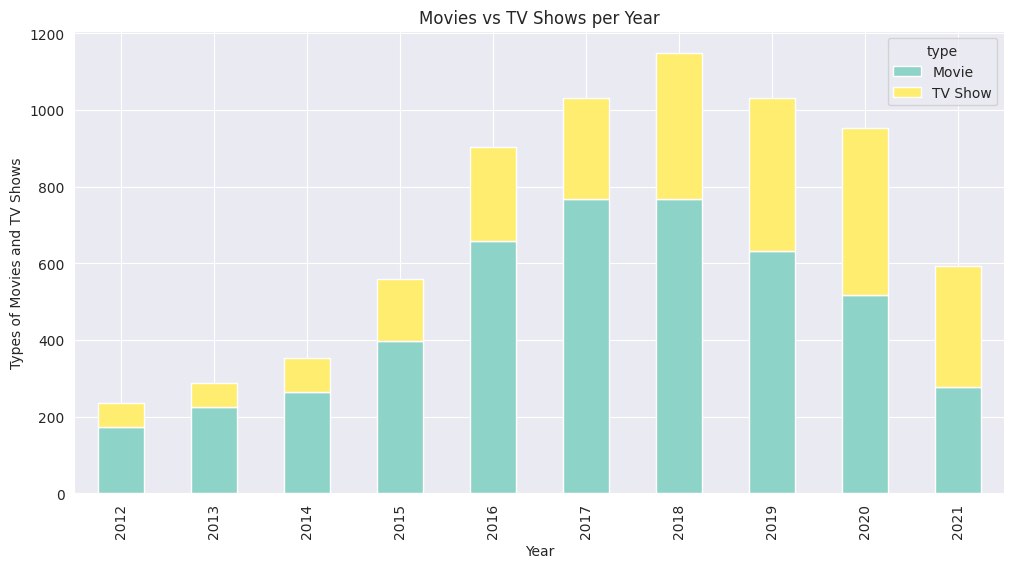

In [ ]:
import matplotlib.pyplot as plt
max_year = df['release_year'].max()
last10 = df[df['release_year'] >= max_year - 9]
last10.groupby(['release_year','type']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(12,6), colormap="Set3"
)
plt.xlabel("Year")
plt.ylabel("Types of Movies and TV Shows")
plt.title("Movies vs TV Shows per Year")
plt.show()

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.to_csv("netflix_cleaned.csv", index=False)
from google.colab import files
files.download("netflix_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>